### Data Cleaning for Final Project

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

data = pd.read_csv("data/chicago_weather.csv")

In [2]:
# force numeric numbers

data["year"] = data.datetime.str[:4].astype(int)
data["month"] = data.datetime.str[5:7].astype(int)
data["day"] = data.datetime.str[8:].astype(int)

data["sunrisetime"] = (data.sunrise.str[11:13].astype(int) + data.sunrise.str[14:16].astype(int)/60).round(2)
data["sunsettime"] = (data.sunset.str[11:13].astype(int) + data.sunset.str[14:16].astype(int)/60).round(2)
data["daytimehour"] = (data.sunsettime - data.sunrisetime).round(2)

In [3]:
# select a sample of visualizing one winter

sample = data[['datetime', 'year', 'month', 'day', 'temp', 'feelslike', 
             'humidity', 'windspeed', 'sunrisetime', 'sunsettime', 'daytimehour']]

# winter_21_22 = sample.loc[((sample['month'] > 10) & (sample['year'] == 2021)) | 
#                ((sample['month'] < 3) & (sample['year'] == 2022)) ]

# winter_21_22.to_csv("winter21-22.csv")

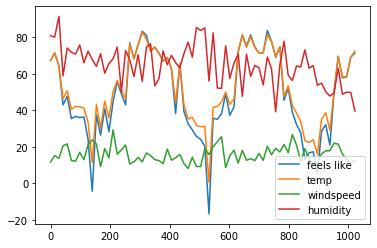

In [16]:
# check the visualization

# select the first day of every two weeks?
# small_sample = sample[0::14]

# x = small_sample.datetime
# plt.plot(small_sample.feelslike, label = "feels like")
# plt.plot(small_sample.temp, label = "temp")
# plt.plot(small_sample.windspeed, label = "windspeed")
# plt.plot(small_sample.humidity, label = "humidity")

# plt.legend()
# plt.show()

In [4]:
sample

,datetime,year,month,day,temp,feelslike,humidity,windspeed,sunrisetime,sunsettime,daytimehour
0,2011-10-01,2011,10,1,49.3,46.6,69.9,15.8,6.78,18.53,11.75
1,2011-10-02,2011,10,2,52.7,51.4,64.2,7.9,6.80,18.50,11.70
2,2011-10-03,2011,10,3,56.6,56.5,63.4,12.3,6.82,18.48,11.66
3,2011-10-04,2011,10,4,58.9,58.9,68.0,5.7,6.83,18.45,11.62
4,2011-10-05,2011,10,5,64.4,64.4,58.9,6.6,6.85,18.42,11.57
...,...,...,...,...,...,...,...,...,...,...,...
3921,2022-06-26,2022,6,26,75.8,75.7,56.8,18.8,5.28,20.48,15.20
3922,2022-06-27,2022,6,27,70.6,70.6,42.8,14.6,5.28,20.48,15.20
3923,2022-06-28,2022,6,28,75.3,74.5,41.4,13.8,5.28,20.48,15.20
3924,2022-06-29,2022,6,29,78.1,78.0,50.6,11.6,5.30,20.48,15.18


In [5]:
# winters = sample[(sample["month"] <= 3) | (sample["month"] >= 10)]
winters = sample

In [5]:

temp_data = sample.groupby("month").aggregate(
    avg_temp = pd.NamedAgg(column="temp", aggfunc=mean),
    avg_feelslike = pd.NamedAgg(column="feelslike", aggfunc=mean),
    avg_humidity = pd.NamedAgg(column="humidity", aggfunc=mean),
    avg_windspeed = pd.NamedAgg(column="windspeed", aggfunc=mean)
)

temp_data["diff"] = temp_data["avg_feelslike"] - temp_data["avg_temp"]

temp_data = temp_data.round(2)
temp_data.to_csv("data/yearly_temp.csv")
temp_data

,avg_temp,avg_feelslike,avg_humidity,avg_windspeed,diff
month,,,,,
1,26.24,17.03,70.86,16.36,-9.20
2,27.77,19.02,67.57,16.55,-8.75
3,39.96,34.32,63.66,16.99,-5.64
4,49.26,46.05,60.36,17.74,-3.22
5,62.08,61.31,62.06,16.04,-0.77
6,72.17,72.47,61.94,15.24,0.29
7,76.30,77.18,64.02,14.19,0.88
8,74.92,75.41,64.92,13.53,0.49
9,68.64,68.83,65.25,14.48,0.18


In [12]:
# for i in range(16):
#     print("if", (-11.25 + 22.5 * i), "< degree <=", (-11.25 + 22.5 * (i + 1)), ":")

if -11.25 < degree <= 11.25 :
if 11.25 < degree <= 33.75 :
if 33.75 < degree <= 56.25 :
if 56.25 < degree <= 78.75 :
if 78.75 < degree <= 101.25 :
if 101.25 < degree <= 123.75 :
if 123.75 < degree <= 146.25 :
if 146.25 < degree <= 168.75 :
if 168.75 < degree <= 191.25 :
if 191.25 < degree <= 213.75 :
if 213.75 < degree <= 236.25 :
if 236.25 < degree <= 258.75 :
if 258.75 < degree <= 281.25 :
if 281.25 < degree <= 303.75 :
if 303.75 < degree <= 326.25 :
if 326.25 < degree <= 348.75 :


In [6]:
def label_winddir(row):

    degree = row["winddir"]

    if 0 <= degree <= 11.25 or 348.75 <= degree < 0:
        return "N"
    if 11.25 < degree <= 33.75:
        return "NNE"
    if 33.75 < degree <= 56.25:
        return "NE"
    if 56.25 < degree <= 78.75:
        return "ENE"
    if 78.75 < degree <= 101.25:
        return "E"
    if 101.25 < degree <= 123.75:
        return "ESE"
    if 123.75 < degree <= 146.25:
        return "SE"
    if 146.25 < degree <= 168.75:
        return "SSE"
    if 168.75 < degree <= 191.25:
        return "S"
    if 191.25 < degree <= 213.75:
        return "SSW"
    if 213.75 < degree <= 236.25:
        return "SW"
    if 236.25 < degree <= 258.75:
        return "WSW"
    if 258.75 < degree <= 281.25:
        return "W"
    if 281.25 < degree <= 303.75:
        return "WNW"
    if 303.75 < degree <= 326.25:
        return "NW"
    if 326.25 < degree <= 348.75:
        return "NNW"

In [7]:
wind = data[["month", "windspeed", "winddir"]]

wind['direction'] = wind.apply (lambda row: label_winddir(row), axis=1)

wind_data = wind.groupby(["month", "direction"]).aggregate(
    avg_windspeed = pd.NamedAgg(column="windspeed", aggfunc=mean),
    agg_windspeed = pd.NamedAgg(column="windspeed", aggfunc=sum)
)

wind_data = wind_data.round(2)

wind_data.to_csv("data/wind_data.csv")

/tmp/user/21872/ipykernel_3102255/1761721261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['direction'] = wind.apply (lambda row: label_winddir(row), axis=1)


In [8]:
wind_data

avg_windspeed  agg_windspeed
month direction                              
1     E                  12.80           64.0
      ENE                12.90           77.4
      ESE                19.03           57.1
      N                  12.45           49.8
      NE                 15.75          236.3
...                        ...            ...
12    SSW                16.42          722.7
      SW                 14.77          531.6
      W                  16.49         1022.6
      WNW                15.28          351.5
      WSW                18.08          687.2

[192 rows x 2 columns]

In [13]:
wind = pd.read_csv("data/wind_data.csv")
jan_wind = wind[wind["month"] == 1]
jan_wind.to_csv("data/jan_wind.csv")

In [14]:
data = pd.read_csv("data/chicago_weather.csv")

data["year"] = data.datetime.str[:4].astype(int)
data["month"] = data.datetime.str[5:7].astype(int)
data["day"] = data.datetime.str[8:].astype(int)

data["sunrisetime"] = (data.sunrise.str[11:13].astype(int) + data.sunrise.str[14:16].astype(int)/60).round(2)
data["sunsettime"] = (data.sunset.str[11:13].astype(int) + data.sunset.str[14:16].astype(int)/60).round(2)
data["daytimehour"] = (data.sunsettime - data.sunrisetime).round(2)

In [15]:
# create data for average sunlight and aggregated solar energy of (currently) one winter

# the data collecting has a limit of 1000 queries per day
# this later on will be the average data across the years

from statistics import mean

solar21 = data.groupby("month").aggregate(
    avg_sunrisetime = pd.NamedAgg(column="sunrisetime", aggfunc=mean),
    avg_sunsettime = pd.NamedAgg(column="sunsettime", aggfunc=mean),
    avg_daytime = pd.NamedAgg(column="daytimehour", aggfunc=mean),
    agg_solar_energy = pd.NamedAgg(column="solarenergy", aggfunc=sum)
)

solar21 = solar21.round(2)

In [16]:
solar21.to_csv("solar_21.csv")
solar21

,avg_sunrisetime,avg_sunsettime,avg_daytime,agg_solar_energy
month,,,,
1,7.22,16.76,9.54,1978.8
2,6.76,17.37,10.61,2821.6
3,6.68,18.65,11.97,4383.9
4,6.15,19.53,13.38,5288.6
5,5.50,20.07,14.57,6286.1
6,5.26,20.43,15.17,6452.5
7,5.50,20.36,14.86,6259.7
8,5.99,19.80,13.81,5784.8
9,6.51,18.97,12.46,4504.1
